<a href="https://colab.research.google.com/github/Sohail-collab/Spotify-powerbi-analysis-dashboard/blob/main/covid19casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
deaths = pd.read_excel('/content/drive/MyDrive/covid_19_dataset-1718175635.xlsx', sheet_name='covid_19_deaths_v1')
deaths     #.head() showing 1st few rows if we use .head(3) showinf 1st 3 rows tail() showing last few rows

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


In [ ]:
confirmed = pd.read_excel('/content/drive/MyDrive/covid_19_dataset-1718175635.xlsx', sheet_name='covid_19_confirmed_v1')
confirmed


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92754,92920,93106,93201,93279,93428,93627,93947,94430,94751


In [ ]:
recovered_cases = pd.read_excel('/content/drive/MyDrive/covid_19_dataset-1718175635.xlsx', sheet_name='covid_19_recovered_v1')
recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,2687,2689,2721,2721,2794,2794,2853,2853,2896,2896
257,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,295643,296901,297201,297201,298502,299024,299559,299559,300125,300524
258,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,3159,3179,3201,3245,3260,3273,3306,3339,3375,3399
259,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,90955,91019,91102,91156,91200,91221,91239,91321,91443,91594


In [ ]:

confirmed.columns

Index(['Province/State', 'Country/Region',            'Lat',           'Long',
              '1/22/20',        '1/23/20',        '1/24/20',        '1/25/20',
              '1/26/20',        '1/27/20',
       ...
              '5/20/21',        '5/21/21',        '5/22/21',        '5/23/21',
              '5/24/21',        '5/25/21',        '5/26/21',        '5/27/21',
              '5/28/21',        '5/29/21'],
      dtype='object', length=498)

In [ ]:
# pandas.melt(id_vars=none, value_vars=none, var_name=none, value_name='value')
id_vars = ['Province/State','Country/Region', 'Lat', 'Long'] # we freez this 1st four column and then transpose rest column

# Standardize date column names in the 'confirmed' DataFrame before melting
new_confirmed_columns = []
for col in confirmed.columns:
    if isinstance(col, (pd.Timestamp, datetime.datetime)):
        # Convert datetime objects to string in 'MM/DD/YY' format
        new_confirmed_columns.append(col.strftime('%m/%d/%y'))
    else:
        new_confirmed_columns.append(col)

confirmed.columns = new_confirmed_columns

all_cols = confirmed.columns.tolist()
# [exprasion for condition (optional condition)]
date_cols = [col for col in all_cols if col not in id_vars]

confirmed_long = confirmed.melt(id_vars=id_vars, value_vars=date_cols, var_name='Date', value_name='Confirmed')
confirmed_long         #after this except given column in confermed.melt all columns will transpose

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
136339,NaN,Vietnam,14.058324,108.277199,5/29/21,6908
136340,NaN,West Bank and Gaza,31.952200,35.233200,5/29/21,307838
136341,NaN,Yemen,15.552727,48.516388,5/29/21,6731
136342,NaN,Zambia,-13.133897,27.849332,5/29/21,94751


In [ ]:
#deaths [melting --> unpivot]
# pandas.melt(id_vars=none, value_vars=none, var_name=none, value_name='value')
id_vars = ['Province/State','Country/Region', 'Lat', 'Long'] # we freez this 1st four column and then transpose rest column

# Standardize date column names in the 'deaths' DataFrame before melting
new_deaths_columns = []
for col in deaths.columns:
    if isinstance(col, (pd.Timestamp, datetime.datetime)):
        # Convert datetime objects to string in 'MM/DD/YY' format
        new_deaths_columns.append(col.strftime('%m/%d/%y'))
    else:
        new_deaths_columns.append(col)
deaths.columns = new_deaths_columns

all_cols = deaths.columns.tolist()
# [exprasion for condition (optional condition)]
date_cols = [col for col in all_cols if col not in id_vars]

deaths_long = deaths.melt(id_vars=id_vars, value_vars=date_cols, var_name='Date', value_name='Deaths')
deaths_long           #after this except given column in deaths.melt all columns will transpose

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0.0
...,...,...,...,...,...,...
136339,NaN,Vietnam,14.058324,108.277199,5/29/21,47.0
136340,NaN,West Bank and Gaza,31.952200,35.233200,5/29/21,3492.0
136341,NaN,Yemen,15.552727,48.516388,5/29/21,1319.0
136342,NaN,Zambia,-13.133897,27.849332,5/29/21,1276.0


In [ ]:
#recoverd [melting --> unpivot]
# pandas.melt(id_vars=none, value_vars=none, var_name=none, value_name='value')
id_vars = ['Province/State','Country/Region', 'Lat', 'Long'] # we freez this 1st four column and then transpose rest column

# Standardize date column names in the 'recovered_cases' DataFrame before melting
new_recovered_columns = []
for col in recovered_cases.columns:
    if isinstance(col, (pd.Timestamp, datetime.datetime)):
        # Convert datetime objects to string in 'MM/DD/YY' format
        new_recovered_columns.append(col.strftime('%m/%d/%y'))
    else:
        new_recovered_columns.append(col)
recovered_cases.columns = new_recovered_columns

all_cols = recovered_cases.columns.tolist()
# [exprasion for condition (optional condition)]
date_cols = [col for col in all_cols if col not in id_vars]

recovered_cases_long = recovered_cases.melt(id_vars=id_vars, value_vars=date_cols, var_name='Date', value_name='Recovered')
recovered_cases_long        #after this except given column in recovercases.melt all columns will transpose

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0.0
...,...,...,...,...,...,...
128929,NaN,Vietnam,14.058324,108.277199,5/29/21,2896.0
128930,NaN,West Bank and Gaza,31.952200,35.233200,5/29/21,300524.0
128931,NaN,Yemen,15.552727,48.516388,5/29/21,3399.0
128932,NaN,Zambia,-13.133897,27.849332,5/29/21,91594.0


In [ ]:
#date_cols = [col for col in all_cols if col not in id_vars] ise hum asey bhi likh skte h
# col --> column
date_cols = []
for c in all_cols:
  if c not in id_vars:
    date_cols.append(c)
date_cols


['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '01/02/20',
 '02/02/20',
 '03/02/20',
 '04/02/20',
 '05/02/20',
 '06/02/20',
 '07/02/20',
 '08/02/20',
 '09/02/20',
 '10/02/20',
 '11/02/20',
 '12/02/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '01/03/20',
 '02/03/20',
 '03/03/20',
 '04/03/20',
 '05/03/20',
 '06/03/20',
 '07/03/20',
 '08/03/20',
 '09/03/20',
 '10/03/20',
 '11/03/20',
 '12/03/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '01/04/20',
 '02/04/20',
 '03/04/20',
 '04/04/20',
 '05/04/20',
 '06/04/20',
 '07/04/20',
 '08/04/20',
 '09/04/20',
 '10/04/20',
 '11/0

In [ ]:
confirmed_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136344 entries, 0 to 136343
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  42484 non-null   object 
 1   Country/Region  136344 non-null  object 
 2   Lat             135356 non-null  float64
 3   Long            135356 non-null  float64
 4   Date            136344 non-null  object 
 5   Confirmed       136344 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 6.2+ MB


In [ ]:
confirmed_long['Province/State'].value_counts(dropna = False)

,count
Province/State,
NaN,93860
Australian Capital Territory,494
New South Wales,494
Northern Territory,494
Queensland,494
...,...
Gibraltar,494
Isle of Man,494
Montserrat,494


In [ ]:
confirmed_long['Province/State'] = confirmed_long['Province/State'].fillna('All Provinces')
confirmed_long['Lat'] = pd.to_numeric(confirmed_long['Lat']).fillna(0)
confirmed_long['Long'] = pd.to_numeric(confirmed_long['Long']).fillna(0)
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'], format='%m/%d/%y', errors = "coerce")
confirmed_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136344 entries, 0 to 136343
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  136344 non-null  object        
 1   Country/Region  136344 non-null  object        
 2   Lat             136344 non-null  float64       
 3   Long            136344 non-null  float64       
 4   Date            136344 non-null  datetime64[ns]
 5   Confirmed       136344 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 6.2+ MB


In [ ]:
deaths_long['Province/State'] = deaths_long['Province/State'].fillna('All Provinces')
deaths_long['Lat'] = pd.to_numeric(deaths_long['Lat']).fillna(0)
deaths_long['Long'] = pd.to_numeric(deaths_long['Long']).fillna(0)
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'], format='%m/%d/%y', errors = "coerce")
deaths_long.info()
deaths_long.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136344 entries, 0 to 136343
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  136344 non-null  object        
 1   Country/Region  136344 non-null  object        
 2   Lat             136344 non-null  float64       
 3   Long            136344 non-null  float64       
 4   Date            136344 non-null  datetime64[ns]
 5   Deaths          136343 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 6.2+ MB


,Province/State,Country/Region,Lat,Long,Date,Deaths
0,All Provinces,Afghanistan,33.93911,67.709953,2020-01-22,0.0
1,All Provinces,Albania,41.15330,20.168300,2020-01-22,0.0
2,All Provinces,Algeria,28.03390,1.659600,2020-01-22,0.0
3,All Provinces,Andorra,42.50630,1.521800,2020-01-22,0.0
4,All Provinces,Angola,-11.20270,17.873900,2020-01-22,0.0


In [ ]:
recovered_cases_long['Province/State'] = recovered_cases_long['Province/State'].fillna('All Provinces')
recovered_cases_long['Lat'] = pd.to_numeric(recovered_cases_long['Lat']).fillna(0)
recovered_cases_long['Long'] = pd.to_numeric(recovered_cases_long['Long']).fillna(0)
recovered_cases_long['Date'] = pd.to_datetime(recovered_cases_long['Date'], format='%m/%d/%y', errors = "coerce")
recovered_cases_long.info()
recovered_cases_long.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128934 entries, 0 to 128933
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  128934 non-null  object        
 1   Country/Region  128934 non-null  object        
 2   Lat             128934 non-null  float64       
 3   Long            128934 non-null  float64       
 4   Date            128934 non-null  datetime64[ns]
 5   Recovered       128933 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 5.9+ MB


,Province/State,Country/Region,Lat,Long,Date,Recovered
0,All Provinces,Afghanistan,33.93911,67.709953,2020-01-22,0.0
1,All Provinces,Albania,41.15330,20.168300,2020-01-22,0.0
2,All Provinces,Algeria,28.03390,1.659600,2020-01-22,0.0
3,All Provinces,Andorra,42.50630,1.521800,2020-01-22,0.0
4,All Provinces,Angola,-11.20270,17.873900,2020-01-22,0.0


In [ ]:
recovered_cases_long

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,All Provinces,Afghanistan,33.939110,67.709953,2020-01-22,0.0
1,All Provinces,Albania,41.153300,20.168300,2020-01-22,0.0
2,All Provinces,Algeria,28.033900,1.659600,2020-01-22,0.0
3,All Provinces,Andorra,42.506300,1.521800,2020-01-22,0.0
4,All Provinces,Angola,-11.202700,17.873900,2020-01-22,0.0
...,...,...,...,...,...,...
128929,All Provinces,Vietnam,14.058324,108.277199,2021-05-29,2896.0
128930,All Provinces,West Bank and Gaza,31.952200,35.233200,2021-05-29,300524.0
128931,All Provinces,Yemen,15.552727,48.516388,2021-05-29,3399.0
128932,All Provinces,Zambia,-13.133897,27.849332,2021-05-29,91594.0


In [ ]:
# cd [country & Date]
confirmed_cd = (
    confirmed_long.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()
)
confirmed_cd

,Country/Region,Date,Confirmed
0,Afghanistan,2020-01-02,0
1,Afghanistan,2020-01-03,1
2,Afghanistan,2020-01-04,197
3,Afghanistan,2020-01-05,2291
4,Afghanistan,2020-01-06,15753
...,...,...,...
95337,Zimbabwe,2021-12-01,23239
95338,Zimbabwe,2021-12-02,35045
95339,Zimbabwe,2021-12-03,36423
95340,Zimbabwe,2021-12-04,37307


In [ ]:
confirmed_cd[confirmed_cd['Country/Region'] == 'China'].head(25)

,Country/Region,Date,Confirmed
17784,China,2020-01-02,11891
17785,China,2020-01-03,79932
17786,China,2020-01-04,82361
17787,China,2020-01-05,83959
17788,China,2020-01-06,84154
17789,China,2020-01-07,84816
17790,China,2020-01-08,87827
17791,China,2020-01-09,89933
17792,China,2020-01-10,90567
17793,China,2020-01-11,91397


In [ ]:
deaths_cd = (
    deaths_long.groupby(['Country/Region', 'Date'])['Deaths'].sum().reset_index()
)
deaths_cd

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-02,0.0
1,Afghanistan,2020-01-03,0.0
2,Afghanistan,2020-01-04,4.0
3,Afghanistan,2020-01-05,68.0
4,Afghanistan,2020-01-06,266.0
...,...,...,...
95337,Zimbabwe,2021-12-01,551.0
95338,Zimbabwe,2021-12-02,1393.0
95339,Zimbabwe,2021-12-03,1496.0
95340,Zimbabwe,2021-12-04,1542.0


In [ ]:
deaths_cd[deaths_cd['Country/Region'] == 'China'].head(25)
# If you intend to convert only the 'Deaths' column to integer:
# deaths_cd[deaths_cd['Country/Region'] == 'China'].head(25).astype({'Deaths': int})

,Country/Region,Date,Deaths
17784,China,2020-01-02,259.0
17785,China,2020-01-03,2872.0
17786,China,2020-01-04,3316.0
17787,China,2020-01-05,4637.0
17788,China,2020-01-06,4638.0
17789,China,2020-01-07,4641.0
17790,China,2020-01-08,4667.0
17791,China,2020-01-09,4724.0
17792,China,2020-01-10,4739.0
17793,China,2020-01-11,4739.0


In [ ]:
recovered_cases_cd = (
    recovered_cases_long.groupby(['Country/Region', 'Date'])['Recovered'].sum().reset_index()
)
recovered_cases_cd

,Country/Region,Date,Recovered
0,Afghanistan,2020-01-02,0.0
1,Afghanistan,2020-01-03,0.0
2,Afghanistan,2020-01-04,5.0
3,Afghanistan,2020-01-05,310.0
4,Afghanistan,2020-01-06,1428.0
...,...,...,...
95337,Zimbabwe,2021-12-01,13396.0
95338,Zimbabwe,2021-12-02,29959.0
95339,Zimbabwe,2021-12-03,33996.0
95340,Zimbabwe,2021-12-04,34901.0


In [ ]:
merged = (
    confirmed_cd
    .merge(deaths_cd, on=['Country/Region', 'Date'], how='inner')
    .merge(recovered_cases_cd, on=['Country/Region', 'Date'], how='inner')
    .sort_values(by=['Country/Region', 'Date'])
    .fillna(0) #optinal
)
merged

,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-02,0,0.0,0.0
1,Afghanistan,2020-01-03,1,0.0,0.0
2,Afghanistan,2020-01-04,197,4.0,5.0
3,Afghanistan,2020-01-05,2291,68.0,310.0
4,Afghanistan,2020-01-06,15753,266.0,1428.0
...,...,...,...,...,...
95337,Zimbabwe,2021-12-01,23239,551.0,13396.0
95338,Zimbabwe,2021-12-02,35045,1393.0,29959.0
95339,Zimbabwe,2021-12-03,36423,1496.0,33996.0
95340,Zimbabwe,2021-12-04,37307,1542.0,34901.0


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95342 entries, 0 to 95341
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  95342 non-null  object        
 1   Date            95342 non-null  datetime64[ns]
 2   Confirmed       95342 non-null  int64         
 3   Deaths          95342 non-null  float64       
 4   Recovered       95342 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 3.6+ MB


In [ ]:
#generate the plots of cinfirmed cases over time for top countries
import pandas as pd
import matplotlib.pyplot as plt

latest_dates = merged.groupby('Country/Region')['Date'].max()
latest_dates

,Date
Country/Region,
Afghanistan,2021-12-05
Albania,2021-12-05
Algeria,2021-12-05
Andorra,2021-12-05
Angola,2021-12-05
...,...
Vietnam,2021-12-05
West Bank and Gaza,2021-12-05
Yemen,2021-12-05


In [ ]:
#new dataframe
latest_totals = merged.copy()
latest_totals = latest_totals[latest_totals['Date'] == '2021-05-29']
latest_totals

,Country/Region,Date,Confirmed,Deaths,Recovered
458,Afghanistan,2021-05-29,70111,2899.0,57281.0
952,Albania,2021-05-29,132297,2449.0,129215.0
1446,Algeria,2021-05-29,128456,3460.0,89419.0
1940,Andorra,2021-05-29,13693,127.0,13416.0
2434,Angola,2021-05-29,34180,757.0,27646.0
...,...,...,...,...,...
93330,Vietnam,2021-05-29,6908,47.0,2896.0
93824,West Bank and Gaza,2021-05-29,307838,3492.0,300524.0
94318,Yemen,2021-05-29,6731,1319.0,3399.0
94812,Zambia,2021-05-29,94751,1276.0,91594.0


In [ ]:
latest_totals = (merged.merge(latest_dates.rename('LatestDates'), on=['Country/Region'], how='inner')
                .query('Date == LatestDates'))
latest_totals

,Country/Region,Date,Confirmed,Deaths,Recovered,LatestDates
493,Afghanistan,2021-12-05,62718,2713.0,54534.0,2021-12-05
987,Albania,2021-12-05,131845,2423.0,120072.0,2021-12-05
1481,Algeria,2021-12-05,124682,3350.0,86857.0,2021-12-05
1975,Andorra,2021-12-05,13470,127.0,13104.0,2021-12-05
2469,Angola,2021-12-05,29405,645.0,25187.0,2021-12-05
...,...,...,...,...,...,...
93365,Vietnam,2021-12-05,3658,35.0,2636.0,2021-12-05
93859,West Bank and Gaza,2021-12-05,303270,3401.0,288891.0,2021-12-05
94353,Yemen,2021-12-05,6498,1277.0,3003.0,2021-12-05
94847,Zambia,2021-12-05,92211,1259.0,90574.0,2021-12-05


In [ ]:
latest_totals = latest_totals.set_index('Country/Region')['Confirmed']
latest_totals

,Confirmed
Country/Region,
Afghanistan,62718
Albania,131845
Algeria,124682
Andorra,13470
Angola,29405
...,...
Vietnam,3658
West Bank and Gaza,303270
Yemen,6498


In [ ]:
top5_countries = latest_totals.nlargest(5)
top5_countries

,Confirmed
Country/Region,
US,32814784
India,23703665
Brazil,15359397
France,5882882
Turkey,5072462


In [ ]:
top5_countries = latest_totals.nlargest(5).index
top5_countries

Index(['US', 'India', 'Brazil', 'France', 'Turkey'], dtype='object', name='Country/Region')

In [ ]:
top5_countries = latest_totals.nlargest(5).index.tolist()
top5_countries

['US', 'India', 'Brazil', 'France', 'Turkey']

In [ ]:
#visulazation
plt.figure(figsize = (12,6))
for country in top5_countries:
  top_countries = (merged[merged['Country/Region'] == country].sort_values('Date'))

top_countries

,Country/Region,Date,Confirmed,Deaths,Recovered
87932,Turkey,2020-01-02,0,0.0,0.0
87933,Turkey,2020-01-03,0,0.0,0.0
87934,Turkey,2020-01-04,15679,277.0,333.0
87935,Turkey,2020-01-05,122392,3258.0,53808.0
87936,Turkey,2020-01-06,164769,4563.0,128947.0
...,...,...,...,...,...
88421,Turkey,2021-12-01,2346285,23152.0,2218464.0
88422,Turkey,2021-12-02,2572190,27284.0,2461204.0
88423,Turkey,2021-12-03,2850930,29356.0,2670273.0
88424,Turkey,2021-12-04,3903573,34182.0,3372629.0


<Figure size 1200x600 with 0 Axes>

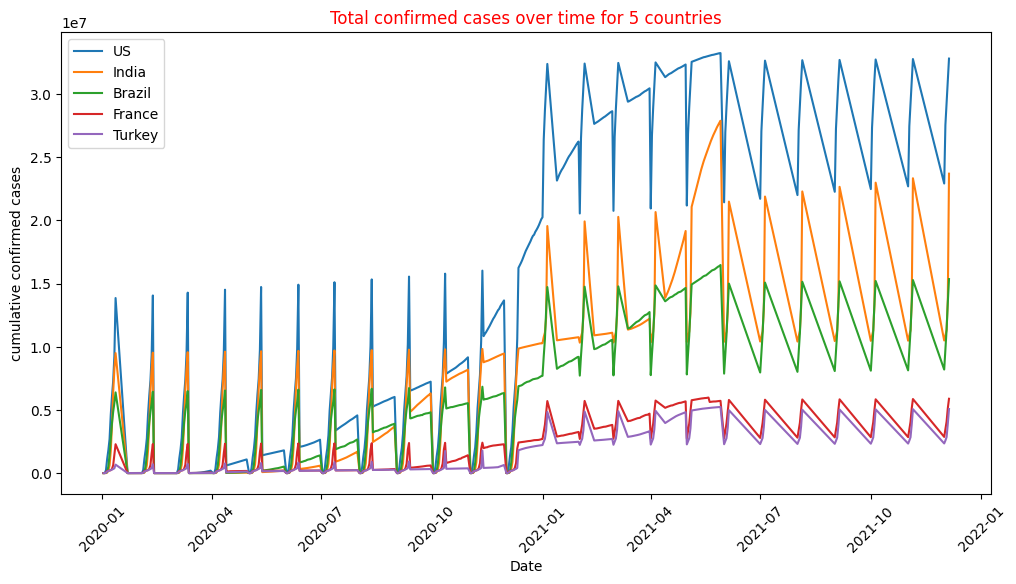

In [ ]:
plt.figure(figsize = (12,6))
for country in top5_countries:
  top_countries = (merged[merged['Country/Region'] == country].sort_values('Date'))
  plt.plot(top_countries['Date'], top_countries['Confirmed'], label = country)

plt.title("Total confirmed cases over time for 5 countries" , color = 'red')
plt.xlabel("Date")
plt.ylabel("cumulative confirmed cases")
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# generate the plots of confirmed cases over time for china
china = confirmed_long[confirmed_long['Country/Region'] == 'China'].copy()
china

,Province/State,Country/Region,Lat,Long,Date,Confirmed
58,Anhui,China,31.8257,117.2264,2020-01-22,1
59,Beijing,China,40.1824,116.4142,2020-01-22,14
60,Chongqing,China,30.0572,107.8740,2020-01-22,6
61,Fujian,China,26.0789,117.9874,2020-01-22,1
62,Gansu,China,35.7518,104.2861,2020-01-22,0
...,...,...,...,...,...,...
136155,Tibet,China,31.6927,88.0924,2021-05-29,1
136156,Unknown,China,0.0000,0.0000,2021-05-29,0
136157,Xinjiang,China,41.1129,85.2401,2021-05-29,980
136158,Yunnan,China,24.9740,101.4870,2021-05-29,352


In [ ]:
china = china.groupby(['Date', 'Province/State'])['Confirmed'].sum().reset_index()
china

,Date,Province/State,Confirmed
0,2020-01-02,Anhui,297
1,2020-01-02,Beijing,168
2,2020-01-02,Chongqing,247
3,2020-01-02,Fujian,144
4,2020-01-02,Gansu,40
...,...,...,...
16791,2021-12-05,Tibet,1
16792,2021-12-05,Unknown,0
16793,2021-12-05,Xinjiang,980
16794,2021-12-05,Yunnan,348


In [ ]:
china_wide = china.pivot(index = 'Date', columns = 'Province/State', values = 'Confirmed').sort_index()
china_wide

Province/State,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,...,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Unknown,Xinjiang,Yunnan,Zhejiang
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,297,168,247,144,40,535,100,29,62,96,...,206,169,47,207,41,1,0,18,93,599
2020-01-03,990,413,576,296,91,1349,252,146,168,318,...,758,337,133,538,136,1,0,76,174,1205
2020-01-04,990,580,579,345,138,1501,254,146,168,323,...,774,516,137,552,176,1,0,76,182,1257
2020-01-05,991,593,579,356,139,1588,254,147,168,328,...,787,652,197,561,190,1,0,76,185,1268
2020-01-06,991,593,579,358,139,1596,254,147,169,328,...,792,673,198,577,192,1,0,76,185,1268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,993,998,590,529,182,2078,264,147,171,770,...,864,1573,227,857,324,1,0,980,231,1308
2021-12-02,994,1046,591,548,187,2157,267,147,171,1316,...,867,1757,239,877,348,1,0,980,231,1320
2021-12-03,994,1049,591,553,187,2243,267,147,171,1317,...,869,1830,241,929,362,1,0,980,234,1322


In [ ]:
top_prov = china_wide.iloc[-1].nlargest(10)
top_prov

,2021-12-05
Province/State,
Hubei,68158
Hong Kong,11814
Guangdong,2383
Shanghai,2025
Heilongjiang,1610
Zhejiang,1347
Hebei,1317
Henan,1312
Beijing,1057


In [ ]:
china_wide = china_wide[top_prov.index]
china_wide

Province/State,Hubei,Hong Kong,Guangdong,Shanghai,Heilongjiang,Zhejiang,Hebei,Henan,Beijing,Hunan
Date,,,,,,,,,,
2020-01-02,7153,13,535,169,80,599,96,422,168,389
2020-01-03,66907,96,1349,337,480,1205,318,1272,413,1018
2020-01-04,67802,765,1501,516,484,1257,323,1276,580,1018
2020-01-05,68128,1039,1588,652,944,1268,328,1276,593,1019
2020-01-06,68135,1087,1596,673,945,1268,328,1276,593,1019
...,...,...,...,...,...,...,...,...,...,...
2021-12-01,68149,9343,2078,1573,988,1308,770,1302,998,1022
2021-12-02,68150,10755,2157,1757,1609,1320,1316,1303,1046,1033
2021-12-03,68151,11210,2243,1830,1610,1322,1317,1309,1049,1038


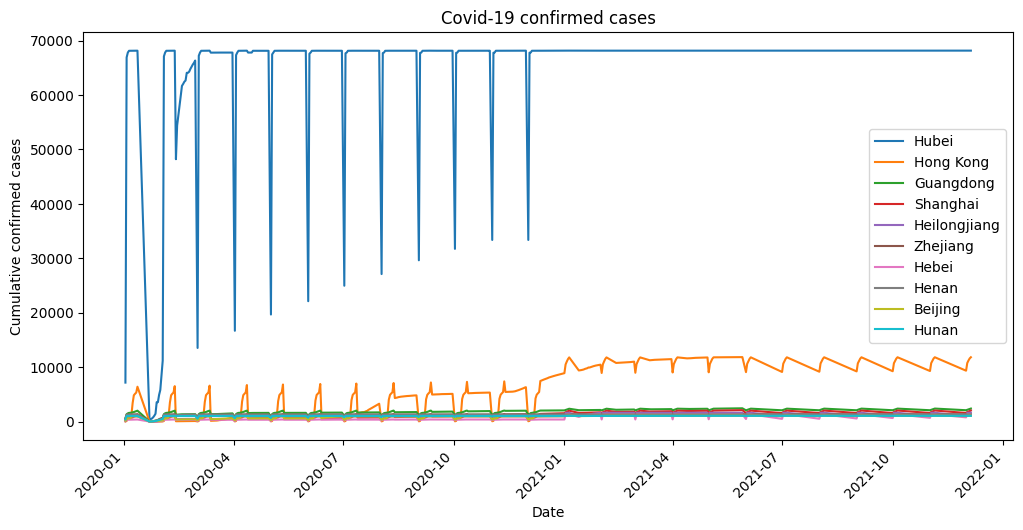

In [ ]:
#visulaization
ax = china_wide.plot(figsize = (12,6))
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative confirmed cases")
ax.set_title("Covid-19 confirmed cases")
ax.legend(top_prov.index)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#analyiz the peak number of dailyty nees cases in germany, france,itasly
#which country experinced highest singlrday surge and when did it occur
target_countries = ['Germany', 'France', 'Italy']
country_date_total = (
    merged.loc[merged['Country/Region'].isin(target_countries)]
    .groupby(['Country/Region', 'Date'])['Confirmed']
    .sum().reset_index()
    .sort_values(['Country/Region', 'Date'])
)
country_date_total


,Country/Region,Date,Confirmed
0,France,2020-01-02,6
1,France,2020-01-03,130
2,France,2020-01-04,57122
3,France,2020-01-05,169387
4,France,2020-01-06,191382
...,...,...,...
1477,Italy,2021-12-01,2303263
1478,Italy,2021-12-02,2697296
1479,Italy,2021-12-03,3175807
1480,Italy,2021-12-04,3779594


In [ ]:
#cumulative -> daily new confirmed cases within each country .diff()
country_date_total['DailyNew'] = (
    country_date_total.groupby('Country/Region')['Confirmed']
    .diff()
    .fillna(country_date_total['Confirmed'])
)
country_date_total

,Country/Region,Date,Confirmed,DailyNew
0,France,2020-01-02,6,6.0
1,France,2020-01-03,130,124.0
2,France,2020-01-04,57122,56992.0
3,France,2020-01-05,169387,112265.0
4,France,2020-01-06,191382,21995.0
...,...,...,...,...
1477,Italy,2021-12-01,2303263,-1819967.0
1478,Italy,2021-12-02,2697296,394033.0
1479,Italy,2021-12-03,3175807,478511.0
1480,Italy,2021-12-04,3779594,603787.0


In [ ]:
#pivot table
daily_new_matrix = (
    country_date_total
    .pivot(index = 'Date', columns = 'Country/Region', values = 'DailyNew').sort_index()
)
daily_new_matrix

Country/Region,France,Germany,Italy
Date,,,
2020-01-02,6.0,8.0,2.0
2020-01-03,124.0,122.0,1692.0
2020-01-04,56992.0,77742.0,108880.0
2020-01-05,112265.0,86205.0,96854.0
2020-01-06,21995.0,19517.0,25769.0
...,...,...,...
2021-12-01,-2997024.0,-1589578.0,-1819967.0
2021-12-02,622313.0,362096.0,394033.0
2021-12-03,589062.0,228874.0,478511.0


In [ ]:
#pivot table
daily_new_matrix = (
    country_date_total
    .pivot(index = 'Date', columns = 'Country/Region', values = 'DailyNew')
    .sort_index()
)
daily_new_matrix

Country/Region,France,Germany,Italy
Date,,,
2020-01-02,6.0,8.0,2.0
2020-01-03,124.0,122.0,1692.0
2020-01-04,56992.0,77742.0,108880.0
2020-01-05,112265.0,86205.0,96854.0
2020-01-06,21995.0,19517.0,25769.0
...,...,...,...
2021-12-01,-2997024.0,-1589578.0,-1819967.0
2021-12-02,622313.0,362096.0,394033.0
2021-12-03,589062.0,228874.0,478511.0


In [ ]:
daily_increase = country_date_total.groupby('Country/Region')['Confirmed'].diff()

# Initialize 'DailyNew' column with raw differences
country_date_total['DailyNew'] = daily_increase

# For the first entry of each country, the 'DailyNew' is the 'Confirmed' value itself
# (as it's the first recorded count for that country)
first_day_mask = country_date_total.groupby('Country/Region').cumcount() == 0
country_date_total.loc[first_day_mask, 'DailyNew'] = country_date_total.loc[first_day_mask, 'Confirmed']

# Ensure 'DailyNew' values are not negative (e.g., due to data corrections)
# If cases decrease or stay the same, daily new cases are 0.
country_date_total['DailyNew'] = country_date_total['DailyNew'].clip(lower=0)

country_date_total

,Country/Region,Date,Confirmed,DailyNew
0,France,2020-01-02,6,6.0
1,France,2020-01-03,130,124.0
2,France,2020-01-04,57122,56992.0
3,France,2020-01-05,169387,112265.0
4,France,2020-01-06,191382,21995.0
...,...,...,...,...
1477,Italy,2021-12-01,2303263,0.0
1478,Italy,2021-12-02,2697296,394033.0
1479,Italy,2021-12-03,3175807,478511.0
1480,Italy,2021-12-04,3779594,603787.0


In [ ]:
#pivot table
daily_new_matrix = (
    country_date_total
    .pivot(index = 'Date', columns = 'Country/Region', values = 'DailyNew').sort_index()
)
daily_new_matrix

Country/Region,France,Germany,Italy
Date,,,
2020-01-02,6.0,8.0,2.0
2020-01-03,124.0,122.0,1692.0
2020-01-04,56992.0,77742.0,108880.0
2020-01-05,112265.0,86205.0,96854.0
2020-01-06,21995.0,19517.0,25769.0
...,...,...,...
2021-12-01,0.0,0.0,0.0
2021-12-02,622313.0,362096.0,394033.0
2021-12-03,589062.0,228874.0,478511.0


In [ ]:
#target_countries = ['german,fance,italy]
daily_new_by_country = {}
for country in target_countries:
  if country in daily_new_matrix.columns:
    s = daily_new_matrix[country]
    daily_new_by_country[country] = s

daily_new_by_country


{'Germany': Date
 2020-01-02         8.0
 2020-01-03       122.0
 2020-01-04     77742.0
 2020-01-05     86205.0
 2020-01-06     19517.0
                 ...   
 2021-12-01         0.0
 2021-12-02    362096.0
 2021-12-03    228874.0
 2021-12-04    465308.0
 2021-12-05    539890.0
 Name: Germany, Length: 494, dtype: float64,
 'France': Date
 2020-01-02          6.0
 2020-01-03        124.0
 2020-01-04      56992.0
 2020-01-05     112265.0
 2020-01-06      21995.0
                 ...    
 2021-12-01          0.0
 2021-12-02     622313.0
 2021-12-03     589062.0
 2021-12-04    1052405.0
 2021-12-05     754742.0
 Name: France, Length: 494, dtype: float64,
 'Italy': Date
 2020-01-02         2.0
 2020-01-03      1692.0
 2020-01-04    108880.0
 2020-01-05     96854.0
 2020-01-06     25769.0
                 ...   
 2021-12-01         0.0
 2021-12-02    394033.0
 2021-12-03    478511.0
 2021-12-04    603787.0
 2021-12-05    351484.0
 Name: Italy, Length: 494, dtype: float64}

In [ ]:
# peaks [country] : (max_value, date) per date
peaks = {}
for country, series in daily_new_by_country.items():
  max_value = int(series.max())
  max_date = series.idxmax()
  peaks[country] = (max_value, max_date)
peaks


{'Germany': (592770, Timestamp('2021-06-05 00:00:00')),
 'France': (1163615, Timestamp('2020-12-11 00:00:00')),
 'Italy': (911566, Timestamp('2020-01-12 00:00:00'))}

In [ ]:
print("peak daily new cases (value, date):")
for country, (values, when) in peaks.items():
  print(f" {country:} -> {values} on {when.date()}")

peak daily new cases (value, date):
 Germany -> 592770 on 2021-06-05
 France -> 1163615 on 2020-12-11
 Italy -> 911566 on 2020-01-12


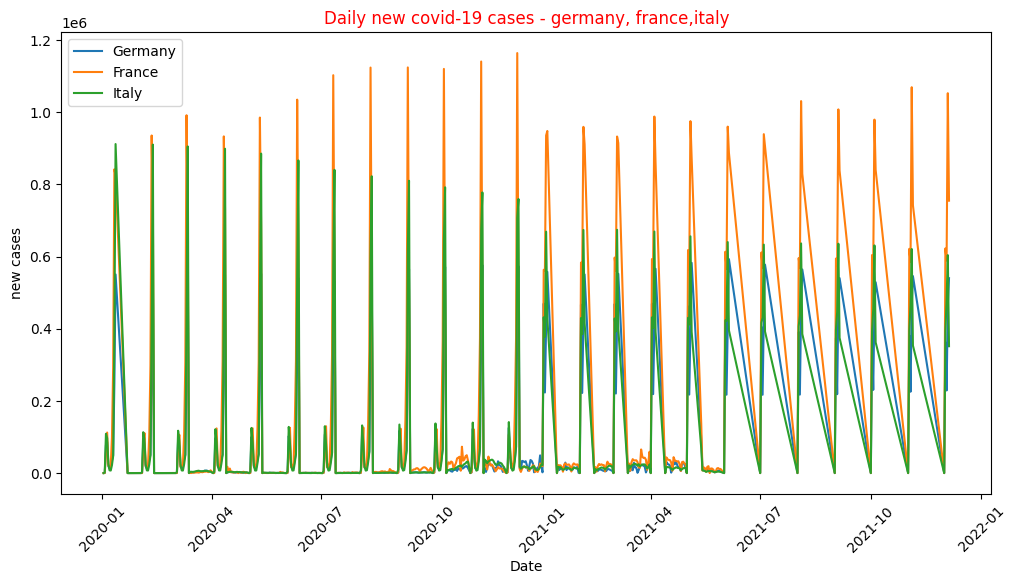

In [ ]:
plt.figure(figsize = (12,6))
for country , series in daily_new_by_country.items():
  plt.plot(series.index, series.values, label = country)

plt.title("Daily new covid-19 cases - germany, france,italy", color="red")
plt.xlabel("Date")
plt.ylabel("new cases")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
#compare the recovery rates (recoveries/confirmed cases) between canada and australia as of december 31, 2020.
#which country showed better management of the pandemic according to this metric?

countries = ['Canada', 'Australia']
target_date = pd.Timestamp("2020-12-31")

recovery_rates = (
    merged.loc[
       (merged['Country/Region'].isin(countries)) & (merged['Date'] == target_date), # rows
    ['Country/Region', 'Recovered', 'Confirmed'] #columns
    ].groupby('Country/Region').sum().reset_index()
)
recovery_rates

,Country/Region,Recovered,Confirmed
0,Australia,22565.0,28425
1,Canada,493638.0,584409


In [ ]:
recovery_rates['RecoveryRate%'] = (recovery_rates['Recovered'] / recovery_rates['Confirmed'] * 100).round(2)
recovery_rates

,Country/Region,Recovered,Confirmed,RecoveryRate%
0,Australia,22565.0,28425,79.38
1,Canada,493638.0,584409,84.47


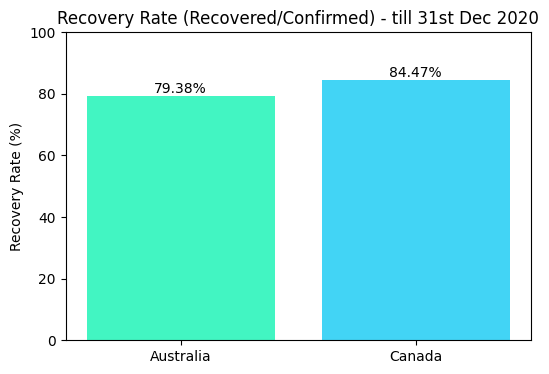

In [ ]:
plt.figure(figsize = (6,4))
bars = plt.bar(recovery_rates['Country/Region'],
               recovery_rates['RecoveryRate%'],
               color = ['#42f5c2' , '#42d4f5'])
plt.title("Recovery Rate (Recovered/Confirmed) - till 31st Dec 2020")
plt.ylabel('Recovery Rate (%)')
plt.ylim(0,100)
plt.bar_label(bars , fmt = '%.2f%%')
plt.show()

In [ ]:
#what is the distribution of death rates (deaths/confirmed cases) among provinces in canada
canada_confirmed_cases = (
    confirmed_long[confirmed_long['Country/Region'] == 'Canada']
    .sort_values('Date')
    .groupby(['Province/State']).tail(1)[['Province/State', 'Confirmed']]
    .set_index('Province/State')
)
canada_confirmed_cases


,Confirmed
Province/State,
Saskatchewan,43673
Alberta,213635
British Columbia,137223
Diamond Princess,0
Grand Princess,13
Manitoba,43143
New Brunswick,2024
Newfoundland and Labrador,1166
Nova Scotia,4301


In [ ]:
#identify the province with highest and lowest death rate as of the latest data point
canada_deaths_cases = (
    deaths_long[deaths_long['Country/Region'] == 'Canada']
    .sort_values('Date')
    .groupby(['Province/State']).tail(1)[['Province/State', 'Deaths']]
    .set_index('Province/State')
)
canada_deaths_cases

,Deaths
Province/State,
Saskatchewan,508.0
Alberta,2123.0
British Columbia,1627.0
Diamond Princess,1.0
Grand Princess,0.0
Manitoba,1000.0
New Brunswick,41.0
Newfoundland and Labrador,6.0
Nova Scotia,71.0


In [ ]:
canada = canada_confirmed_cases.join(canada_deaths_cases , how = 'inner')
canada['DeathRate'] = (canada['Deaths'] / canada['Confirmed'] * 100).round(2).replace([np.inf],0)
canada

,Confirmed,Deaths,DeathRate
Province/State,,,
Saskatchewan,43673,508.0,1.16
Alberta,213635,2123.0,0.99
British Columbia,137223,1627.0,1.19
Diamond Princess,0,1.0,0.00
Grand Princess,13,0.0,0.00
Manitoba,43143,1000.0,2.32
New Brunswick,2024,41.0,2.03
Newfoundland and Labrador,1166,6.0,0.51
Nova Scotia,4301,71.0,1.65


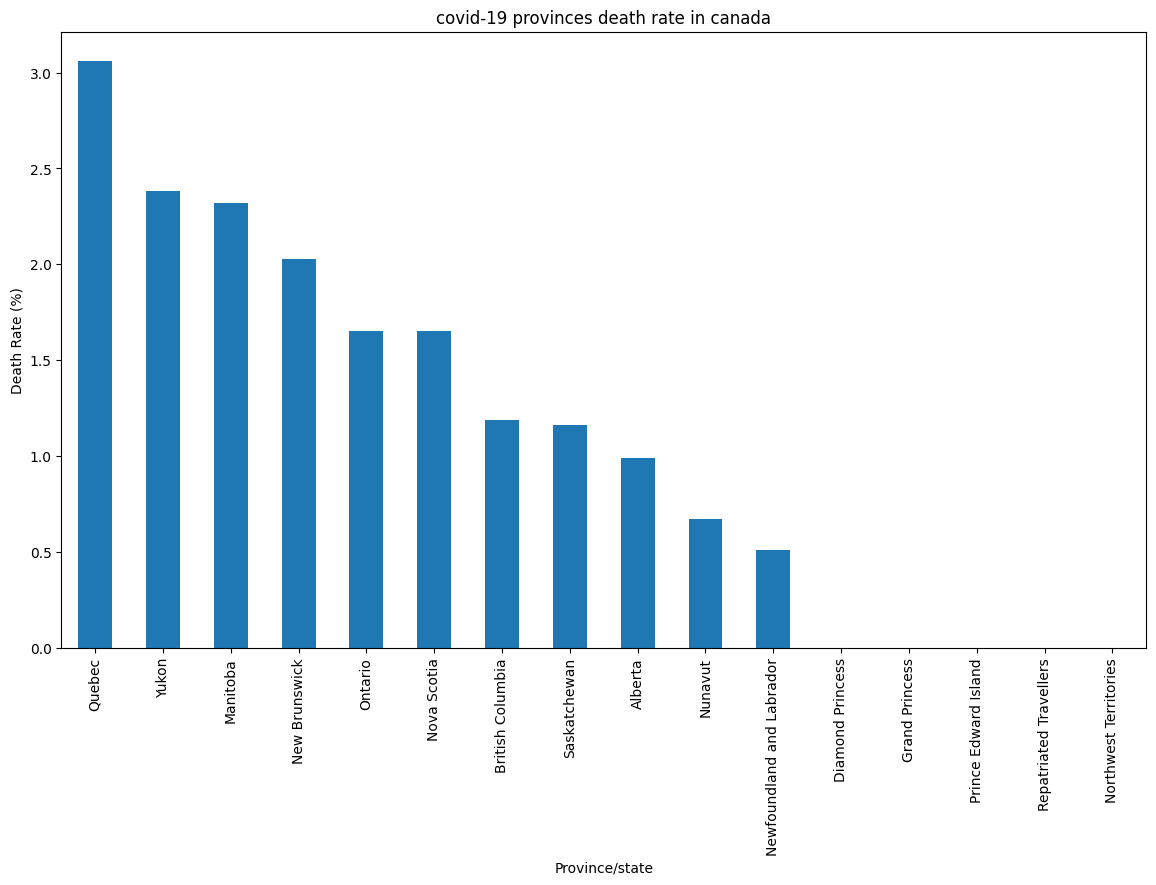

In [ ]:
plt.figure(figsize = (14,8))
canada['DeathRate'].sort_values(ascending = False).plot(kind = 'bar')
plt.title("covid-19 provinces death rate in canada")
plt.xlabel("Province/state")
plt.ylabel("Death Rate (%)")
plt.show()

In [ ]:
# what is the total number of deaths reported per country up to the current date?
latest = merged['Date'].max()
latest

Timestamp('2021-12-05 00:00:00')

In [ ]:
latest_deaths = merged[merged['Date'] == latest]
latest_deaths

,Country/Region,Date,Confirmed,Deaths,Recovered
493,Afghanistan,2021-12-05,62718,2713.0,54534.0
987,Albania,2021-12-05,131845,2423.0,120072.0
1481,Algeria,2021-12-05,124682,3350.0,86857.0
1975,Andorra,2021-12-05,13470,127.0,13104.0
2469,Angola,2021-12-05,29405,645.0,25187.0
...,...,...,...,...,...
93365,Vietnam,2021-12-05,3658,35.0,2636.0
93859,West Bank and Gaza,2021-12-05,303270,3401.0,288891.0
94353,Yemen,2021-12-05,6498,1277.0,3003.0
94847,Zambia,2021-12-05,92211,1259.0,90574.0


In [ ]:
total_deaths_per_country = (
    latest_deaths.groupby('Country/Region')['Deaths'].sum()
    .sort_values(ascending = False).reset_index()
)
total_deaths_per_country.head(25)

,Country/Region,Deaths
0,US,583942.0
1,Brazil,428034.0
2,India,258317.0
3,Mexico,219590.0
4,United Kingdom,127901.0
5,Italy,123544.0
6,Russia,112410.0
7,France,107280.0
8,Germany,85451.0
9,Colombia,79261.0


In [ ]:
#what are the top 5 countries with highest average daily deaths
m = merged.sort_values(['Country/Region', 'Date']).copy()
m['DailyDeaths'] = (
    m.groupby('Country/Region')['Deaths']
    .diff()
    .fillna(0)
)
m

,Country/Region,Date,Confirmed,Deaths,Recovered,DailyDeaths
0,Afghanistan,2020-01-02,0,0.0,0.0,0.0
1,Afghanistan,2020-01-03,1,0.0,0.0,0.0
2,Afghanistan,2020-01-04,197,4.0,5.0,4.0
3,Afghanistan,2020-01-05,2291,68.0,310.0,64.0
4,Afghanistan,2020-01-06,15753,266.0,1428.0,198.0
...,...,...,...,...,...,...
95337,Zimbabwe,2021-12-01,23239,551.0,13396.0,-1028.0
95338,Zimbabwe,2021-12-02,35045,1393.0,29959.0,842.0
95339,Zimbabwe,2021-12-03,36423,1496.0,33996.0,103.0
95340,Zimbabwe,2021-12-04,37307,1542.0,34901.0,46.0


In [ ]:
average_daily_deaths_per_country = (
    m.groupby(['Country/Region'])['DailyDeaths']
    .mean()
    .round(2)
    .sort_values(ascending = False)
    .reset_index(name = 'AvgDailyDeaths')
)
average_daily_deaths_per_country

,Country/Region,AvgDailyDeaths
0,US,1182.07
1,Brazil,866.47
2,India,522.91
3,Mexico,444.51
4,United Kingdom,258.91
...,...,...
188,Laos,0.00
189,Solomon Islands,0.00
190,Saint Kitts and Nevis,0.00
191,Samoa,0.00


In [ ]:
# how have the total desths evolved over the time in the united state
us_death_over_time = (
    deaths_long[deaths_long['Country/Region'] == 'US']
    .groupby('Date')['Deaths']
    .sum()
)
us_death_over_time

,Deaths
Date,
2020-01-02,0.0
2020-01-03,1.0
2020-01-04,6653.0
2020-01-05,68144.0
2020-01-06,108616.0
...,...
2021-12-01,388001.0
2021-12-02,484494.0
2021-12-03,534234.0


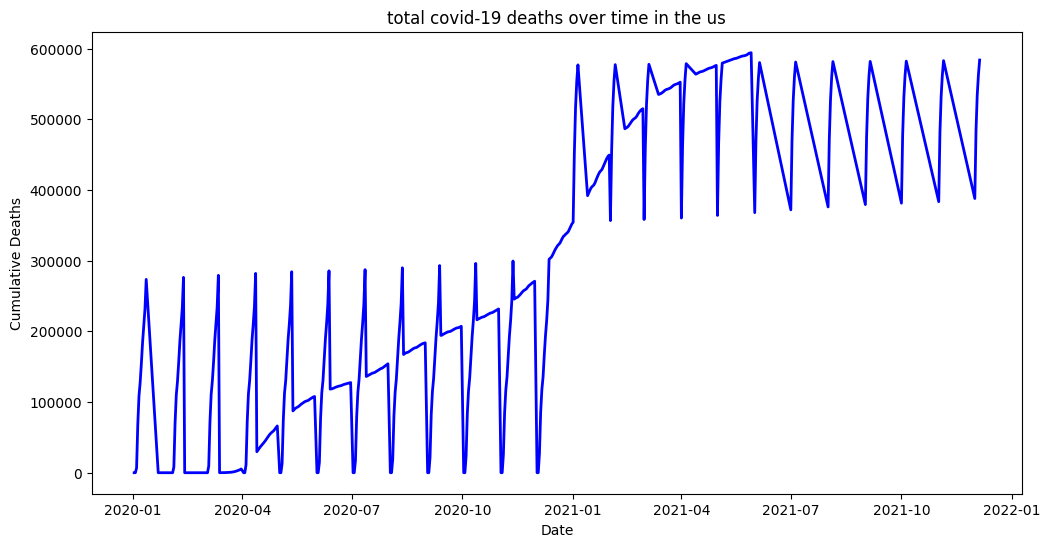

In [ ]:
#plot the cumulative deaths
plt.figure(figsize = (12,6))
plt.plot(us_death_over_time.index, us_death_over_time.values, color = 'blue', linewidth = 2)
plt.title('total covid-19 deaths over time in the us')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.show()

In [ ]:
m = merged.copy()
m = m.sort_values(['Country/Region', 'Date'])
m['YearMonth'] = m['Date'].dt.to_period('M')
m

,Country/Region,Date,Confirmed,Deaths,Recovered,YearMonth
0,Afghanistan,2020-01-02,0,0.0,0.0,2020-01
1,Afghanistan,2020-01-03,1,0.0,0.0,2020-01
2,Afghanistan,2020-01-04,197,4.0,5.0,2020-01
3,Afghanistan,2020-01-05,2291,68.0,310.0,2020-01
4,Afghanistan,2020-01-06,15753,266.0,1428.0,2020-01
...,...,...,...,...,...,...
95337,Zimbabwe,2021-12-01,23239,551.0,13396.0,2021-12
95338,Zimbabwe,2021-12-02,35045,1393.0,29959.0,2021-12
95339,Zimbabwe,2021-12-03,36423,1496.0,33996.0,2021-12
95340,Zimbabwe,2021-12-04,37307,1542.0,34901.0,2021-12


In [ ]:
# daily confirmed
confirmed_diff = m.groupby('Country/Region')['Confirmed'].diff().clip(lower=0)
m['DailyConfirmed'] = confirmed_diff.fillna(0)

# daily Deaths
deaths_diff = m.groupby('Country/Region')['Deaths'].diff().clip(lower=0)
m['DailyDeaths'] = deaths_diff.fillna(0)

# daily recovered
recovered_diff = m.groupby('Country/Region')['Recovered'].diff().clip(lower=0)
m['DailyRecovered'] = recovered_diff.fillna(0)

m

,Country/Region,Date,Confirmed,Deaths,Recovered,YearMonth,DailyConfirmed,DailyDeaths,DailyRecovered
0,Afghanistan,2020-01-02,0,0.0,0.0,2020-01,0.0,0.0,0.0
1,Afghanistan,2020-01-03,1,0.0,0.0,2020-01,1.0,0.0,0.0
2,Afghanistan,2020-01-04,197,4.0,5.0,2020-01,196.0,4.0,5.0
3,Afghanistan,2020-01-05,2291,68.0,310.0,2020-01,2094.0,64.0,305.0
4,Afghanistan,2020-01-06,15753,266.0,1428.0,2020-01,13462.0,198.0,1118.0
...,...,...,...,...,...,...,...,...,...
95337,Zimbabwe,2021-12-01,23239,551.0,13396.0,2021-12,0.0,0.0,0.0
95338,Zimbabwe,2021-12-02,35045,1393.0,29959.0,2021-12,11806.0,842.0,16563.0
95339,Zimbabwe,2021-12-03,36423,1496.0,33996.0,2021-12,1378.0,103.0,4037.0
95340,Zimbabwe,2021-12-04,37307,1542.0,34901.0,2021-12,884.0,46.0,905.0


In [ ]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95342 entries, 0 to 95341
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  95342 non-null  object        
 1   Date            95342 non-null  datetime64[ns]
 2   Confirmed       95342 non-null  int64         
 3   Deaths          95342 non-null  float64       
 4   Recovered       95342 non-null  float64       
 5   YearMonth       95342 non-null  period[M]     
 6   DailyConfirmed  95342 non-null  float64       
 7   DailyDeaths     95342 non-null  float64       
 8   DailyRecovered  95342 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1), period[M](1)
memory usage: 6.5+ MB


In [ ]:
monthly_sum_trends = (
    m.groupby(['Country/Region', 'YearMonth'])[['DailyConfirmed', 'DailyDeaths', 'DailyRecovered']]
    .sum()
    .rename(
        columns = {
            'DailyConfirmed': 'Confirmed',
            'DailyDeaths': 'Deaths',
            'DailyRecovered': 'Recovered'
        }).astype(int)
        .reset_index()
        .sort_values(['Country/Region', 'YearMonth'])
)
monthly_sum_trends

,Country/Region,YearMonth,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01,46516,1822,36946
1,Afghanistan,2020-02,46719,1841,37218
2,Afghanistan,2020-03,46999,1850,37265
3,Afghanistan,2020-04,48298,1888,37488
4,Afghanistan,2020-05,57053,1990,38073
...,...,...,...,...,...
4627,Zimbabwe,2021-08,18754,1108,23868
4628,Zimbabwe,2021-09,17920,1093,23624
4629,Zimbabwe,2021-10,16956,1069,23626
4630,Zimbabwe,2021-11,16151,1051,23008


In [ ]:
# read the analysis in last question for united state , italy and brazil
us_trends = monthly_sum_trends[monthly_sum_trends['Country/Region'] == 'US']
us_trends

,Country/Region,YearMonth,Confirmed,Deaths,Recovered
4296,US,2020-01,13858550,273566,5226581
4297,US,2020-02,14061111,276382,5322132
4298,US,2020-03,14474792,284656,5411030
4299,US,2020-04,15000135,318584,5580854
4300,US,2020-05,15130106,304723,5777354
4301,US,2020-06,15482258,295041,5788469
4302,US,2020-07,16306118,305319,6120778
4303,US,2020-08,16110842,306489,6197092
4304,US,2020-09,16268451,306076,6279175
4305,US,2020-10,17087088,311506,6472929


In [ ]:
brazil_trends = monthly_sum_trends[monthly_sum_trends['Country/Region'] == 'Brazil']
brazil_trends

,Country/Region,YearMonth,Confirmed,Deaths,Recovered
552,Brazil,2020-01,6386787,173817,5712305
553,Brazil,2020-02,6436652,174515,5759294
554,Brazil,2020-03,6492650,175471,5792666
555,Brazil,2020-04,6597725,180642,5861507
556,Brazil,2020-05,6901889,192702,5992969
557,Brazil,2020-06,7155067,193815,6195539
558,Brazil,2020-07,7401429,196959,6615129
559,Brazil,2020-08,7358395,194077,6712983
560,Brazil,2020-09,7208932,191322,6517686
561,Brazil,2020-10,7203776,188651,6521987


In [ ]:
italy_trends = monthly_sum_trends[monthly_sum_trends['Country/Region'] == 'Italy']
italy_trends

,Country/Region,YearMonth,Confirmed,Deaths,Recovered
2040,Italy,2020-01,1620901,56361,784595
2041,Italy,2020-02,1642733,57074,823382
2042,Italy,2020-03,1752959,69200,861099
2043,Italy,2020-04,1734884,66354,912895
2044,Italy,2020-05,1720882,61823,941274
2045,Italy,2020-06,1732951,60575,928877
2046,Italy,2020-07,1746861,60780,938000
2047,Italy,2020-08,1774370,61492,964242
2048,Italy,2020-09,1797254,62023,1011965
2049,Italy,2020-10,2101107,64998,1075392


In [ ]:
#for the combined dataset, identify the three countries with the highest average death rates
#(deaths/confirmed cases) throughout 2020
#what might this indicate about the pandemic's impact in these countries

df = monthly_sum_trends.copy()

df = df.sort_values(['Country/Region', 'YearMonth'])

df_2020 = df[(df['YearMonth'] >= '2020-01') & (df['YearMonth'] <= '2020-12')]

df_2020

,Country/Region,YearMonth,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01,46516,1822,36946
1,Afghanistan,2020-02,46719,1841,37218
2,Afghanistan,2020-03,46999,1850,37265
3,Afghanistan,2020-04,48298,1888,37488
4,Afghanistan,2020-05,57053,1990,38073
...,...,...,...,...,...
4615,Zimbabwe,2020-08,12419,377,12356
4616,Zimbabwe,2020-09,11319,308,9772
4617,Zimbabwe,2020-10,11412,318,9515
4618,Zimbabwe,2020-11,12347,325,9716


In [ ]:
#aggregate totals[confirmed, deaths] over 2020
totals_2020 = (
    df_2020.groupby(['Country/Region'])[['Confirmed', 'Deaths']]
    .sum()
    .rename(
        columns = {
            'Confirmed': 'Confirmed_2020',
            'Deaths': 'Deaths_2020'}
    )
)
totals_2020

,Confirmed_2020,Deaths_2020
Country/Region,,
Afghanistan,599231,23932
Albania,555210,11630
Algeria,1119219,32190
Andorra,89623,983
Angola,198555,4520
...,...,...
Vietnam,17146,437
West Bank and Gaza,1269538,11035
Yemen,26055,7613


In [ ]:
totals_2020['DeathRate'] = (totals_2020['Deaths_2020']/totals_2020['Confirmed_2020'] * 100).round(2)
totals_2020

,Confirmed_2020,Deaths_2020,DeathRate
Country/Region,,,
Afghanistan,599231,23932,3.99
Albania,555210,11630,2.09
Algeria,1119219,32190,2.88
Andorra,89623,983,1.10
Angola,198555,4520,2.28
...,...,...,...
Vietnam,17146,437,2.55
West Bank and Gaza,1269538,11035,0.87
Yemen,26055,7613,29.22


In [ ]:
top_3 = totals_2020.sort_values('DeathRate', ascending = False).head(3)
top_3

,Confirmed_2020,Deaths_2020,DeathRate
Country/Region,,,
Yemen,26055,7613,29.22
MS Zaandam,110,24,21.82
Mexico,15008863,1395249,9.30


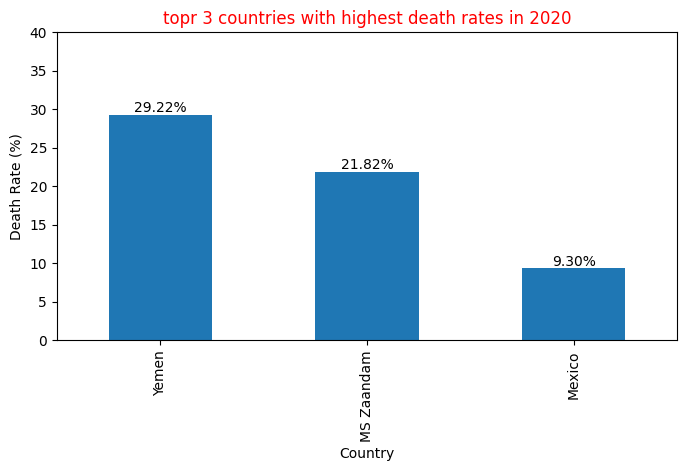

In [ ]:
ax = top_3['DeathRate'].plot(kind = 'bar', figsize = (8,4))
ax.set_title('topr 3 countries with highest death rates in 2020', color = 'red')
ax.set_xlabel('Country')
ax.set_ylabel('Death Rate (%)')
ax.bar_label(ax.containers[0], fmt = '%.2f%%')
plt.ylim(0,40)
plt.show()

In [ ]:
#using the merged dataset, compare the total number of recoveries to the total number of deaths in
# south africa what can this tell us about the outcome of covid19 cases in the country?
df = monthly_sum_trends.copy()
total_recoveries = df[df['Country/Region'] == 'South Africa']['Recovered'].sum()
total_recoveries

np.int64(16831548)

In [ ]:
total_2020 = totals_2020.reset_index()
totals_2020

,Confirmed_2020,Deaths_2020,DeathRate
Country/Region,,,
Afghanistan,599231,23932,3.99
Albania,555210,11630,2.09
Algeria,1119219,32190,2.88
Andorra,89623,983,1.10
Angola,198555,4520,2.28
...,...,...,...
Vietnam,17146,437,2.55
West Bank and Gaza,1269538,11035,0.87
Yemen,26055,7613,29.22


In [ ]:
total_deaths = df[df['Country/Region'] == 'South Africa']['Deaths'].sum()
total_deaths

np.int64(579240)

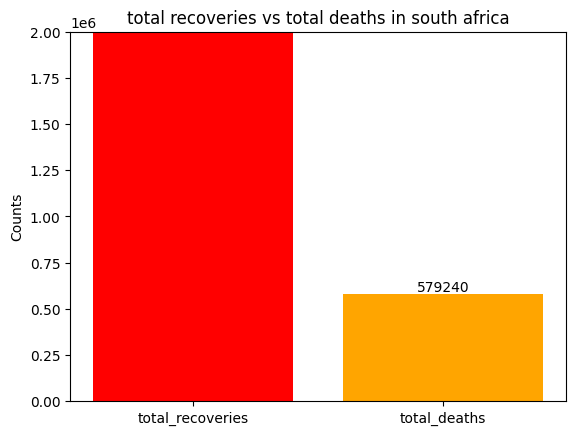

In [ ]:
#plot the visualization
bars = plt.bar(['total_recoveries', 'total_deaths'],[total_recoveries, total_deaths],
               color = ['red' , 'orange'])
plt.title('total recoveries vs total deaths in south africa')
plt.ylabel('Counts')
plt.bar_label(bars)
plt.ylim(0,2000000)
plt.show()

In [ ]:
#analyze the ratio of recoveries to the confirmed cases for the united state on a monthly basis
#from march 2020 to may 2021 which month experiences the highest recovery ratio and
#what could be the potential reason?
us_data = monthly_sum_trends.copy()
us_data = us_data[us_data['Country/Region'] == 'US'].sort_values('YearMonth').set_index('YearMonth')
us_data

,Country/Region,Confirmed,Deaths,Recovered
YearMonth,,,,
2020-01,US,13858550,273566,5226581
2020-02,US,14061111,276382,5322132
2020-03,US,14474792,284656,5411030
2020-04,US,15000135,318584,5580854
2020-05,US,15130106,304723,5777354
2020-06,US,15482258,295041,5788469
2020-07,US,16306118,305319,6120778
2020-08,US,16110842,306489,6197092
2020-09,US,16268451,306076,6279175


In [ ]:
recovery_ratio_us = (
    us_data['Recovered'] / us_data['Confirmed']
)
recovery_ratio_us = recovery_ratio_us.loc['2020-03':'2021-05']
recovery_ratio_us

,0
YearMonth,
2020-03,0.373824
2020-04,0.372054
2020-05,0.381845
2020-06,0.373878
2020-07,0.375367
2020-08,0.384654
2020-09,0.385973
2020-10,0.378820
2020-11,0.381264


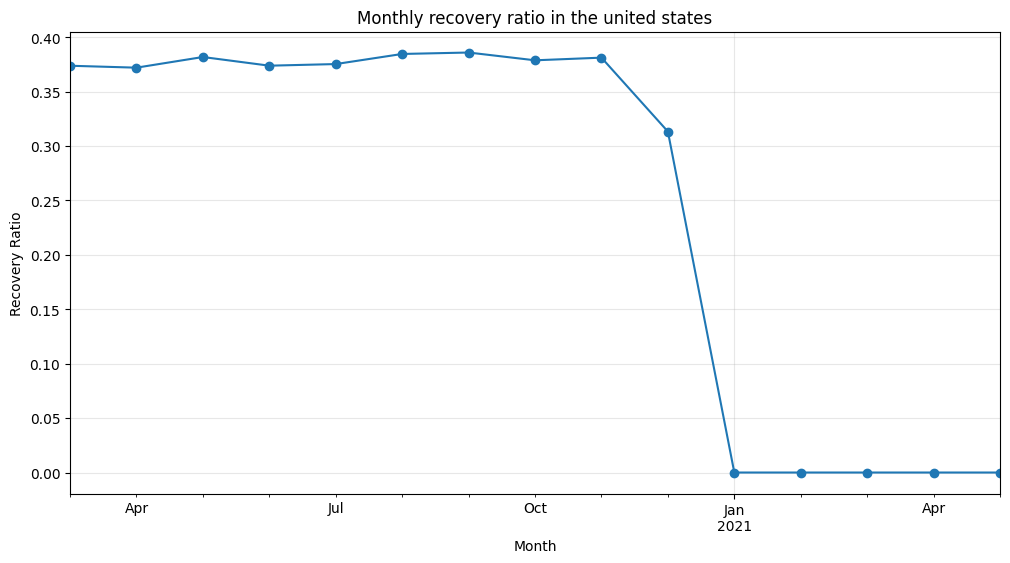

In [ ]:
# plot the rrecovery_ratio us using line plot
fig, ax = plt.subplots(figsize = (12,6))
recovery_ratio_us.plot(kind = 'line', marker = 'o', linestyle ='-', ax = ax)
ax.set_title("Monthly recovery ratio in the united states")
ax.set_xlabel("Month")
ax.set_ylabel("Recovery Ratio")
ax.grid(True , alpha = 0.3)
plt.show()